---
---
## Data cleaning

In [1]:
# Import the organization modules
import pandas as pd
import numpy as np
# Import module to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Import the plot modules
import matplotlib.pyplot as plt
import seaborn as sns
# Import own scripts
from scripts.data_cleaning import (
    read_all_csvs, 
    clean_data,
    create_csv
    )

In [2]:
# Create data frame from all single CSV files
df = read_all_csvs()
# Clean the data
df = clean_data(df)

## Baseline model

In [5]:
# Import 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, fbeta_score

### Dummy Classifier

In [3]:
features = df.columns.to_list()
features.remove('state')
X = df[features]
y = df.state

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [7]:
# Use DummyClassifier as a baseline model
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X_train, y_train)
y_predict = dummy_clf.predict(X_test)


print("f_beta_score: ", fbeta_score(y_test, y_predict, beta = 2, average = 'micro').round(2))

# Print classification report of our model
print(classification_report(y_test, y_predict))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_predict)

f_beta_score:  0.58
              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00      2584
      failed       0.00      0.00      0.00     22546
  successful       0.58      1.00      0.74     35178
   suspended       0.00      0.00      0.00       187

    accuracy                           0.58     60495
   macro avg       0.15      0.25      0.18     60495
weighted avg       0.34      0.58      0.43     60495

--------------------------------------------------------------------------------


### Simple logistic regression

In [21]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

# Print fbeta_score
print("f_beta_score: ", fbeta_score(y_test, y_predict, beta = 2, average = 'micro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

f_beta_score:  0.58
Accuracy on train set: 0.81
Accuracy on test set: 0.81
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    canceled       0.00      0.00      0.00      2584
      failed       0.70      0.90      0.79     22546
  successful       0.92      0.82      0.87     35178
   suspended       0.00      0.00      0.00       187

    accuracy                           0.81     60495
   macro avg       0.40      0.43      0.41     60495
weighted avg       0.79      0.81      0.80     60495

--------------------------------------------------------------------------------


In [19]:
# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

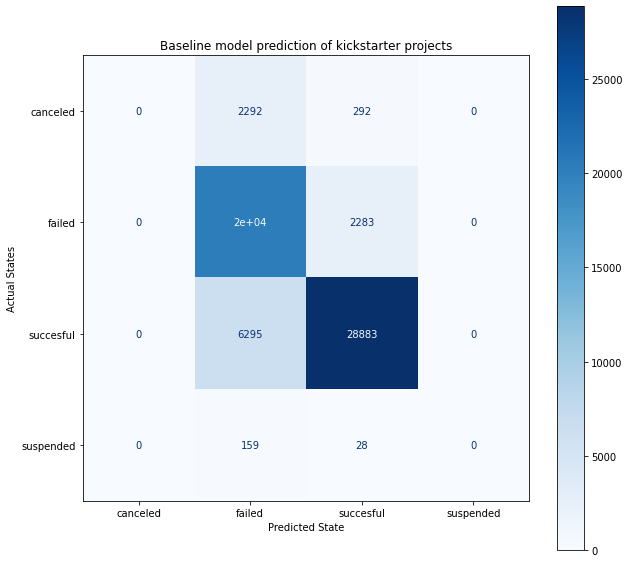

In [20]:
## Create the Confusion Matrix Display Object(cmd_obj). Note the 
## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['canceled', 'failed', 'succesful', 'suspended'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

## Set the color
cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()